- Project Title : (Finance Domain) Utilizing Machine Learning to Forecast the Probability of Successfully Collecting Debts by Analyzing Statute-Barred Status

- Problem Statement : In the realm of debt collection, the ability to discern which accounts are statute-barred—thus potentially unrecoverable—holds immense significance. This project endeavors to develop a sophisticated machine-learning model aimed at accurately predicting the probability of successfully collecting debts by meticulously examining the statute-barred status of each account.
Given a dataset encompassing a multitude of attributes including original creditor information, account IDs, current balances, purchase dates, and a wealth of other pertinent features, the objective is to construct a predictive model that excels in identifying accounts where the statute barred status may influence the likelihood of debt retrieval.
The focal point of this endeavor centers on the IsStatBarred field ‘Y’ status, which serves as the pivotal target variable for classification.

- DataSet Description : Dataset has 406424 rows and 22 columns
Column Descriptions are as follow:

1. EntityID: Unique identifier for each entry.
2. OriginalCreditor[Redacted]: Name of the original creditor, with sensitive information redacted.
3. AccountID: Unique identifier for the account.
4. Current Balance: The current balance of the account.
5. DebtLoadPrincipal: The principal amount of the debt load.
6. BalanceAtDebtLoad: The balance at the time of debt load.
7. PurchasePrice: The price at which the debt was purchased.
8. ProductOrDebtType: Type of product or debt.
9. CollectionStatus: Status of the debt collection
10. Closure Reason: Reason for closing the account.
11. InBankruptcy: Indicates if the account is involved in bankruptcy.
12. AccountInsolvencyType: Type of insolvency related to the account.
13. CustomerInsolvencyType: Type of insolvency related to the customer.
14. IsLegal: Indicates if legal action has been taken.
15. LastPaymentAmount: Amount of the last payment made.
16. LastPaymentMethod: Method used for the last payment.
17. NumLiableParties: Number of liable parties associated with the account.
18. CustomerAge: Age of the customer.
19. NumPhones: Number of phone contacts associated with the customer.
20. NumEmails: Number of email contacts associated with the customer.
21. NumAddresses: Number of addresses associated with the customer.
22. IsStatBarred: Indicates if the debt is statute-barred.






In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score


- Pandas & Numpy: Used for data manipulation and numerical operations.
- Seaborn & Matplotlib: For creating various plots and visualizations.
- Scikit-learn: For machine learning algorithms and utilities like splitting data, scaling, encoding, and more.
- Imbalanced-learn (imblearn): For handling class imbalance using SMOTE (Synthetic Minority Over-sampling Technique).
- Ensemble models: RandomForestClassifier GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, and StackingClassifier are ensemble techniques that improve model performance by combining multiple models.
- Metrics: For evaluating models using accuracy, classification report, ROC AUC score, and confusion matrix.

In [2]:
# Unzipping the dataset

import zipfile
zip = zipfile.ZipFile('/content/Company_x.csv.zip')
zip.extractall('/content')
zip.close()

In [3]:
# Load the dataset
df1 = pd.read_csv('Company_x.csv')

<ipython-input-3-6aae554987b2>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('Company_x.csv')


Since Data set is big to save the execution time we will work on 20% of the data

In [4]:
# Selecting 20% of data to work on

df = df1.sample(frac=0.2)
df.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,...,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred,Unnamed: 22,Unnamed: 23,Unnamed: 24
251668,6102901,Creditor 36,62850622,"1,618.68","1,618.68","1,618.68",52.18,Other,PASSIVE,NaN,...,NaN,1.0,40.0,0,0,1,Y,NaN,NaN,NaN
53836,3010600,Creditor 17,30183104,514.93,514.93,514.93,3.07,Utilities/Telco - Other,PASSIVE,NaN,...,NaN,1.0,66.0,0,0,1,Y,NaN,NaN,NaN
242125,5009270,Creditor 19,50322342,"3,815.91","3,318.18","3,815.91",7.38,Finance Company - Other,CLOSED,Insolvent,...,NaN,1.0,37.0,3,0,1,N,NaN,NaN,NaN
261587,99901113,Creditor 33,990065691,58.94,53.58,53.58,6.59,Utilities/Telco - Other,ACTIVE,NaN,...,NaN,1.0,57.0,0,0,1,Y,NaN,NaN,NaN
154604,3010730,Creditor 33,30364284,402.92,901.00,901.00,3.60,Utilities/Telco - Other,ACTIVE,NaN,...,Cheque,1.0,52.0,0,0,0,Y,NaN,NaN,NaN


# EDA (Exploratory Data Analysis) ,Feature Engineering and Data Pre-processing ---

In [5]:
# Dataset Shape
print("Dataset Shape:", df.shape)

Dataset Shape: (81285, 25)


In [6]:
# General Info
print("Data Info:")
print(df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 81285 entries, 251668 to 215037
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EntityID                    81285 non-null  int64  
 1   OriginalCreditor[Redacted]  81285 non-null  object 
 2   AccountID                   81285 non-null  int64  
 3   CurrentBalance              81285 non-null  object 
 4   DebtLoadPrincipal           81285 non-null  object 
 5   Balanaceatdebt_load         81285 non-null  object 
 6   PurchasePrice               80762 non-null  float64
 7   ProductOrDebtType           81285 non-null  object 
 8   CollectionStatus            81285 non-null  object 
 9   ClosureReason               1754 non-null   object 
 10  InBankruptcy                81285 non-null  object 
 11  AccountInsolvencyType       62 non-null     object 
 12  CustomerInsolvencyType      1662 non-null   object 
 13  IsLegal            

- As we can observe there are 406423 rows and 25 columns with mixed datatypes
int, float and object.

In [7]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
           EntityID     AccountID  PurchasePrice  NumLiableParties  \
count  8.128500e+04  8.128500e+04   80762.000000      81267.000000   
mean   3.950496e+07  3.933833e+08       5.638790          1.016513   
std    4.692842e+07  4.649379e+08       5.520159          0.130964   
min    1.600000e+02  4.276000e+03       0.190000          1.000000   
25%    3.010600e+06  3.023057e+07       3.070000          1.000000   
50%    3.010949e+06  3.045035e+07       4.220000          1.000000   
75%    9.990131e+07  9.901891e+08       6.590000          1.000000   
max    9.990159e+07  9.904958e+08      52.180000          3.000000   

        CustomerAge     NumPhones     NumEmails  NumAddresses  Unnamed: 22  \
count  75504.000000  81285.000000  81285.000000  81285.000000          0.0   
mean      45.728809      0.437731      0.208599      0.847635          NaN   
std       12.918218      0.715049      0.434746      0.459897          NaN   
min      -28.000000      0.000000   

In [8]:
# Observing the Target Variable

# checking value count
df['IsStatBarred'].value_counts()

,count
IsStatBarred,
Y,56777
N,24508


--Clearly there is a class imbalance--

In [9]:
# Checking Missing Value in Target Variable

df.IsStatBarred.isnull().sum()

0

No Missing Value

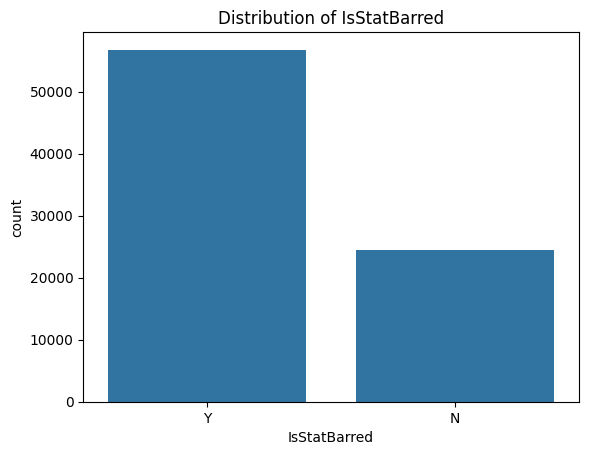

In [10]:
# Visualize the distribution of the target variable

sns.countplot(x='IsStatBarred', data=df)
plt.title("Distribution of IsStatBarred")
plt.show()

In [11]:
# Drop unnecessary columns that are not useful for predictive modeling as these are ID numbers

df = df.drop(columns=['EntityID', 'AccountID', 'OriginalCreditor[Redacted]','Unnamed: 22', 'Unnamed: 23','Unnamed: 24'], axis=1)


In [12]:
# Checking the result

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81285 entries, 251668 to 215037
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CurrentBalance          81285 non-null  object 
 1   DebtLoadPrincipal       81285 non-null  object 
 2   Balanaceatdebt_load     81285 non-null  object 
 3   PurchasePrice           80762 non-null  float64
 4   ProductOrDebtType       81285 non-null  object 
 5   CollectionStatus        81285 non-null  object 
 6   ClosureReason           1754 non-null   object 
 7   InBankruptcy            81285 non-null  object 
 8   AccountInsolvencyType   62 non-null     object 
 9   CustomerInsolvencyType  1662 non-null   object 
 10  IsLegal                 81285 non-null  object 
 11  LastPaymentAmount       20852 non-null  object 
 12  LastPaymentMethod       20852 non-null  object 
 13  NumLiableParties        81267 non-null  float64
 14  CustomerAge             75504 non-nul

- Approach to follow:
We will observe the individual distribution of each feature
(catrgorical and numerical both) along with it relationship with target variable to select that feature for model building.

#### Relationship Analysis: Categorical Features vs Target


In [13]:
# Seperating Categorical Features from the Dataset

categorical_features = df.select_dtypes(include='object').columns
categorical_features

Index(['CurrentBalance', 'DebtLoadPrincipal', 'Balanaceatdebt_load',
       'ProductOrDebtType', 'CollectionStatus', 'ClosureReason',
       'InBankruptcy', 'AccountInsolvencyType', 'CustomerInsolvencyType',
       'IsLegal', 'LastPaymentAmount', 'LastPaymentMethod', 'IsStatBarred'],
      dtype='object')

In [14]:
# So we have follow Categorial Variable:
# 'CurrentBalance',
# 'DebtLoadPrincipal',
# 'Balanaceatdebt_load',
# 'ProductOrDebtType',
# 'CollectionStatus',
# 'ClosureReason'
# 'InBankruptcy',
# 'AccountInsolvencyType'
# 'CustomerInsolvencyType'.
# 'IsLegal',
# 'LastPaymentAmount',
# 'LastPaymentMethod'

# We will look into them one by one

- Approach Followed -
  - Check and handle missing value
  - Use Count plot to observe the distribution with respect to target variable.
- Based upon the percentage of missing value and distribution with target variable we will decide whether to keep the feature for model building or not.

In [15]:
# 1. CurrentBalance

# Checking Missing Vale

df.CurrentBalance.isnull().sum()

0

No Missing Value

In [16]:
# Checking Value Count

df.CurrentBalance.value_counts()

,count
CurrentBalance,
0.00,14178
34.38,124
32.35,98
65.63,72
45.29,72
...,...
"1,631.72",1
381.82,1
"4,767.39",1


In [17]:
# Relationship with Target Variable

# sns.countplot(x='CurrentBalance', hue='IsStatBarred', data=df)
# plt.xticks(rotation=45)
# plt.show()

This feature has a diverse distribution with respect to target variable as it has more than 11k unique values and is likely to be kept

In [18]:
# 2. DebtLoadPrincipal

# Checking the missing values

df.DebtLoadPrincipal.isnull().sum()

0

No missing value

In [19]:
# Checkng the value count

df.DebtLoadPrincipal.value_counts()

,count
DebtLoadPrincipal,
25.00,538
32.00,357
20.00,300
47.00,231
45.00,201
...,...
"1,074.69",1
751.83,1
"1,097.66",1


We have 12k different rows hence distrubution on Target variable will be diverse so its good predictor

In [20]:
#3.Balanaceatdebt_load

# Checking Missing Value

df.Balanaceatdebt_load.isnull().sum()

0

No Missing Value

In [21]:
# Checking Value_Count

df.Balanaceatdebt_load.value_counts()

,count
Balanaceatdebt_load,
34.38,179
32.35,170
45.29,143
26.47,139
40.68,130
...,...
"3,138.09",1
249.31,1
"2,126.94",1


Similar to the features, 'CurrentBalance' and 'DebtLoadPrincipal', Balanaceatdebt_load also has 19k unique values hence distribution with the Target will be diverse hence its a good predictor so we will keep it.

In [22]:
# 4. ProductOrDebtType

# Checking Missing Value

df.ProductOrDebtType.isnull().sum()

0

No Missing Value

In [23]:
# Checking the value count

df.ProductOrDebtType.value_counts()

,count
ProductOrDebtType,
Utilities/Telco - Other,42253
Other,16893
Finance Company - Other,9730
Store Cards,3548
Credit Cards,3478
Bank - Other,2593
Residential Electricity,1548
Personal Loans,893
Loans,258


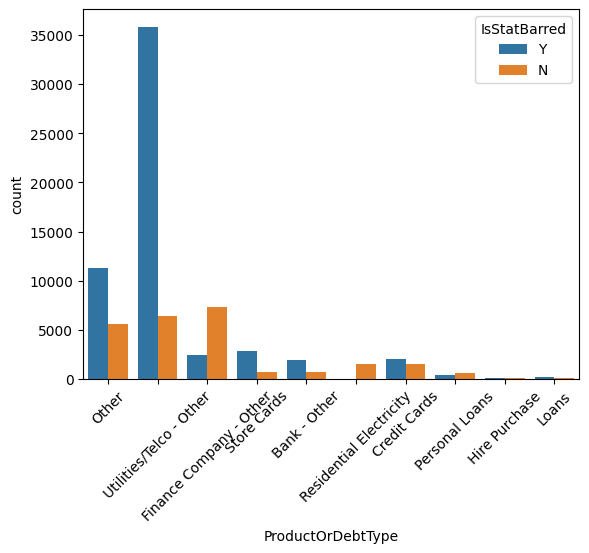

In [24]:
# Relationship with Target Variable

sns.countplot(x='ProductOrDebtType', hue='IsStatBarred', data=df)
plt.xticks(rotation=45)
plt.show()

This feature has a diverse distribution and is likely to be kept

In [25]:
# 5.CollectionStatus

# Checking Missing Value

df.CollectionStatus.isnull().sum()

0

No missing Value

In [26]:
#Checking value count
df.CollectionStatus.value_counts()

,count
CollectionStatus,
ACTIVE,33822
PASSIVE,27593
PAID_IN_FULL,13896
CLOSED,2691
CANCELLED_WITHDRAWN,1081
SETTLED FOR LESS,924
UNDER_ARRANGEMENT,843
LEGAL,306
LEGAL_ARRANGEMENT,61


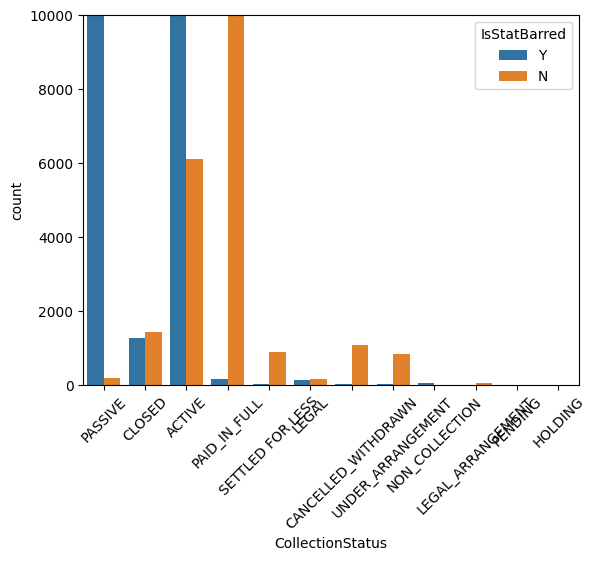

In [27]:
# Relation with Target Variable
sns.countplot(x='CollectionStatus', hue='IsStatBarred', data=df)
plt.xticks(rotation=45)
plt.ylim(0, 10000)
plt.show()

-Categories like 'Holding', 'Pending', 'Non-Collection' has very low frequnecy we can merge then to make one-

In [28]:
# Merging HOLDING and 'PENDING' into NON_COLLECTION
df.CollectionStatus = df.CollectionStatus.replace(['HOLDING','PENDING'],'NON_COLLECTION')

In [29]:
# Checking the Result
df.CollectionStatus.value_counts()

,count
CollectionStatus,
ACTIVE,33822
PASSIVE,27593
PAID_IN_FULL,13896
CLOSED,2691
CANCELLED_WITHDRAWN,1081
SETTLED FOR LESS,924
UNDER_ARRANGEMENT,843
LEGAL,306
NON_COLLECTION,68


This feature shows the variation with the target variable hence to be included in the model

In [30]:
# 6.ClosureReason

# Checking Missing Value as percentage of total rows
df.ClosureReason.isnull().sum() / df.shape[0] * 100

97.84216030017838

-- More than 97% of the values are missing so are dropping this column --

In [31]:
# Dropping the column
df.drop('ClosureReason', axis=1, inplace=True)

In [32]:
# 7. InBankruptcy

# Checking Missing Values

df.InBankruptcy.isnull().sum()

0

No Missing Value

In [33]:
# Checking Value Count

df.InBankruptcy.value_counts()

,count
InBankruptcy,
N,79711
Y,1574


High Imbalance amoung the categories

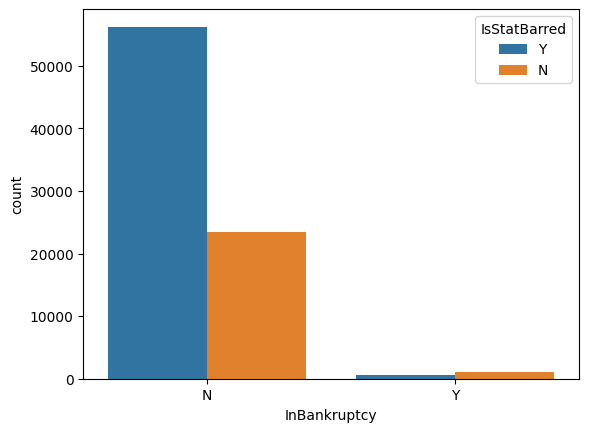

In [34]:
# Relationship with Target Variable

sns.countplot(x='InBankruptcy', hue='IsStatBarred', data=df)
plt.show()

- It shows that people who donot file for Bankruptcy has more percentage in getting barred.This feature is highly imbalanced, but it could still be a valuable predictor depending on its relationship with the target.So we will decide to keep it for model building.

In [35]:
# 8.AccountInsolvencyType

#Checking Missing Value percentage w.r.t no. of rows

df.AccountInsolvencyType.isnull().sum()/df.shape[0]*100

99.9237251645445

--More than 99% of the values are missing from this column has we will drop this column--

In [36]:
# Dropping the column
df.drop('AccountInsolvencyType', axis=1, inplace=True)

In [37]:
# 9.CustomerInsolvencyType:

# Checking Missing Value percentage w.r.t no. of rows

df.CustomerInsolvencyType.isnull().sum()/df.shape[0]*100

97.95534231408008

More than 97% of the values are missing so we will drop this column

In [38]:
# Dropping the column

df.drop('CustomerInsolvencyType', axis=1, inplace=True)

In [39]:
#10. 'IsLegal',

# Checking Missing Value

df.IsLegal.isnull().sum()

0

No Missing Value

In [40]:
# Checking Value_Count

df.IsLegal.value_counts()

,count
IsLegal,
N,79314
Y,1971


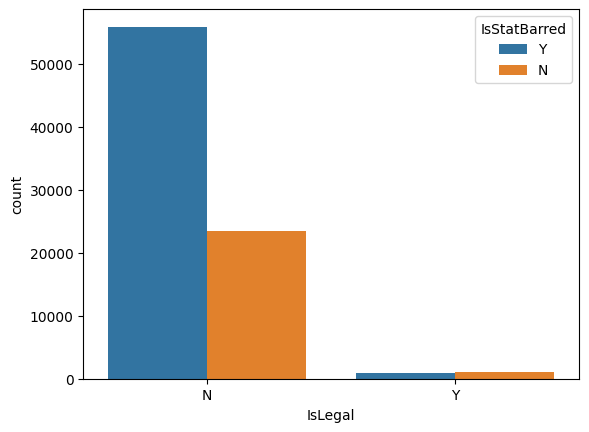

In [41]:
# Relationship with Target Variable

sns.countplot(x = 'IsLegal',hue = 'IsStatBarred', data=df)
plt.show()

There is a clear difference is the distribution of both the categories on the target variable, hence Islegal is a good predictor.

In [42]:
# 11.'LastPaymentAmount',

# Checking the missing value w.r.t no.of rows

df.LastPaymentAmount.isnull().sum()/df.shape[0]*100

74.34705050132251

Close to 75% of the value are null.Due to the high percentage of missing values, we cannot perform mean or median imputation as these values unique values we cannot fill the LastPaymentAmount as mean or median. Here we will use KNN Imputation to predict the missing values.

In [43]:
# KNN Imputation for handling missing value

# Convert 'LastPaymentAmount' to numeric, handling commas

df['LastPaymentAmount'] = df['LastPaymentAmount'].str.replace(',', '').astype(float)
                                              # This step is added as we have LastPaymentAmount in the format of 1,200 so we
                                              # First convert it into string, remove ',' with '' and then conver it into float.

imputer = KNNImputer(n_neighbors=5)
df['LastPaymentAmount'] = imputer.fit_transform(df[['LastPaymentAmount']]) # .fit_transform expect a 2D array that is why
                                                                    # df[['LastPaymentAmount']] is used instead of
                                                                    # df['LastPaynentAmount']
                                        # Alternatively, we can use, df.LastPaymentAmount.values.reshape(-1,1)

In [44]:
# 12.LastPaymentMethod

# Checking Missing Value w.r.t No. of Rows
df.LastPaymentMethod.isnull().sum()/df.shape[0]*100

74.34705050132251

-- Close to 75% of the Values are missing,it could be a good predictor and provide inside info hence we will address missing.Here we will use the random sample imputation to handle missing value--

In [45]:
# Checking Value count
df.LastPaymentMethod.value_counts()

,count
LastPaymentMethod,
Cheque,10888
Automatic Payment,5437
Direct Credit,1800
Direct Debit,1086
Unknown,736
Cash,656
Credit Card / Debit Card,243
Direct Transfer,6


In [46]:
# Handing Missing Values via Random Imputation

index = df[df.LastPaymentMethod.isnull()].index
df.loc[index, 'LastPaymentMethod'] = np.random.choice(df.LastPaymentMethod.dropna().values, size=len(index))

In [47]:
# Checking the result

df.LastPaymentMethod.isnull().sum()

0

In [48]:
# Addtional Step to remove any extra spaces into the category name

df['LastPaymentMethod'] = df['LastPaymentMethod'].str.strip()

In [49]:
# Checking ValueCount post Imputation
df.LastPaymentMethod.value_counts()

,count
LastPaymentMethod,
Cheque,42304
Automatic Payment,21435
Direct Credit,6992
Direct Debit,4230
Unknown,2864
Cash,2505
Credit Card / Debit Card,937
Direct Transfer,18


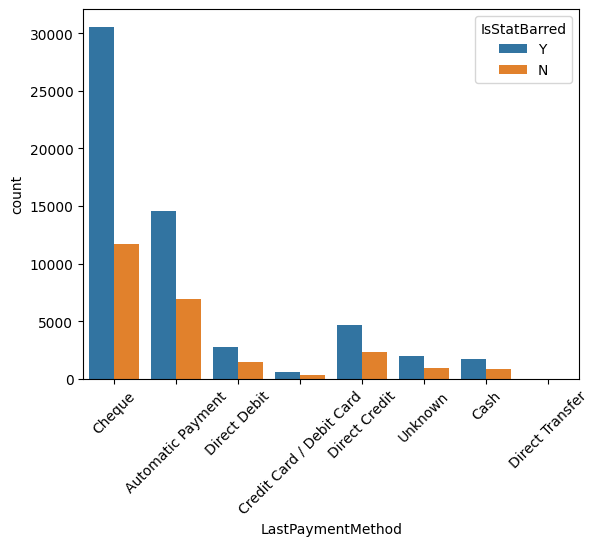

In [50]:
# Relationship with Target Varaible

sns.countplot(x='LastPaymentMethod', hue='IsStatBarred', data = df)
plt.xticks(rotation=45)
plt.show()

-- Categories Like Unknown, Cash, Credit Card/ Debit Card, Direct Transfer and Master Card can be merges into one --

In [51]:
df.LastPaymentMethod.unique()

array(['Cheque', 'Automatic Payment', 'Direct Debit',
       'Credit Card / Debit Card', 'Direct Credit', 'Unknown', 'Cash',
       'Direct Transfer'], dtype=object)

In [52]:
# Merging Unknown, Cash, Credit Card/ Debit Card, Direct Transfer and Master Card to make them others

df.LastPaymentMethod = df.LastPaymentMethod.replace(['Cash', 'Unknown', 'Credit Card / Debit Card', 'Mastercard','Direct Transfer'],'Others')

In [53]:
# Checking the Result post merging

df.LastPaymentMethod.value_counts()

,count
LastPaymentMethod,
Cheque,42304
Automatic Payment,21435
Direct Credit,6992
Others,6324
Direct Debit,4230


-- Here We have completed the relationship analysis of Categorical Variable with Target variable, Now we will observe the relationship of Numerical Column with Target variable --

### Relationship Analysis of Numerical Features with Target Variable

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81285 entries, 251668 to 215037
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CurrentBalance       81285 non-null  object 
 1   DebtLoadPrincipal    81285 non-null  object 
 2   Balanaceatdebt_load  81285 non-null  object 
 3   PurchasePrice        80762 non-null  float64
 4   ProductOrDebtType    81285 non-null  object 
 5   CollectionStatus     81285 non-null  object 
 6   InBankruptcy         81285 non-null  object 
 7   IsLegal              81285 non-null  object 
 8   LastPaymentAmount    81285 non-null  float64
 9   LastPaymentMethod    81285 non-null  object 
 10  NumLiableParties     81267 non-null  float64
 11  CustomerAge          75504 non-null  float64
 12  NumPhones            81285 non-null  int64  
 13  NumEmails            81285 non-null  int64  
 14  NumAddresses         81285 non-null  int64  
 15  IsStatBarred         81285 non-null

In [55]:
#  Collating the Numerical Features from the Dataset

numerical_features = df.select_dtypes(exclude='object').columns

numerical_features

Index(['PurchasePrice', 'LastPaymentAmount', 'NumLiableParties', 'CustomerAge',
       'NumPhones', 'NumEmails', 'NumAddresses'],
      dtype='object')

In [56]:
# We have 6 Numerical Features :
# 1.'PurchasePrice',
# 2.'NumLiableParties',
# 3.'CustomerAge',
# 4.'NumPhones',
# 5.'NumEmails',
# 6.'NumAddresses'

# Lets deal with them one by one by before that lets encode target Variable

# Encoding the target variable

df.IsStatBarred = df.IsStatBarred.map({'Y':1,'N':0})

In [57]:
df.IsStatBarred.value_counts()/df.shape[0]*100

,count
IsStatBarred,
1,69.849296
0,30.150704


#### Starting with Numerical Featurs
- Approach Followed -
  - Check and handle missing value
  - Check the distribution using KDE plot
  - Check the Relationship with target variable on the basis of
      - Box Plot
      - Histogram
      - Correlation
- After observing all the plot make the decision if we want to keep the numerical feature for model building or not.

In [58]:
# 1. 'PurchasePrice'

# Checking Missing Value w.r.t to No. of Rows

df.PurchasePrice.isnull().sum()/df.shape[0]*100

0.6434151442455558

- Less than 1% of the Value are missing, firstly observe the distribution of the column when we will decide which imputution to use to handle missing value

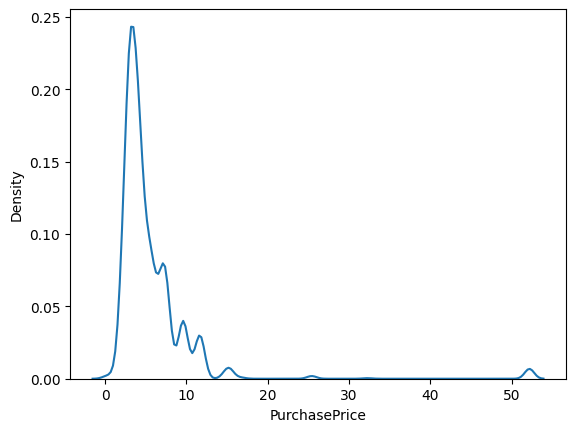

In [59]:
# Observing the distribution

sns.kdeplot(df.PurchasePrice)
plt.show()


Based on the provided KDE plot for 'PurchasePrice', the distribution appears to be right-skewed. Hence we will use median impulation as mean will be sensitive towards the outliers.

In [60]:
# Finding the median of the distibution
df.PurchasePrice.median()

4.22

In [61]:
# Handling Missing Value using Median Imputation

df.PurchasePrice = df.PurchasePrice.fillna(df.PurchasePrice.median())

In [62]:
# Checking the result post medial imputation

df.PurchasePrice.isnull().sum()

0

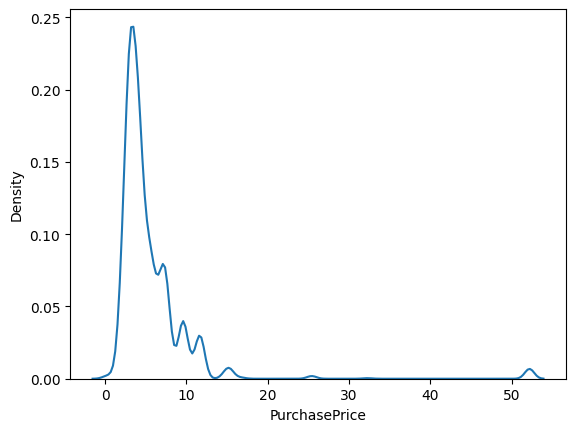

In [63]:
# Checking the distributon after handling missing values

sns.kdeplot(df.PurchasePrice)
plt.show()

-Distribution is similar, no change post doing median imputation

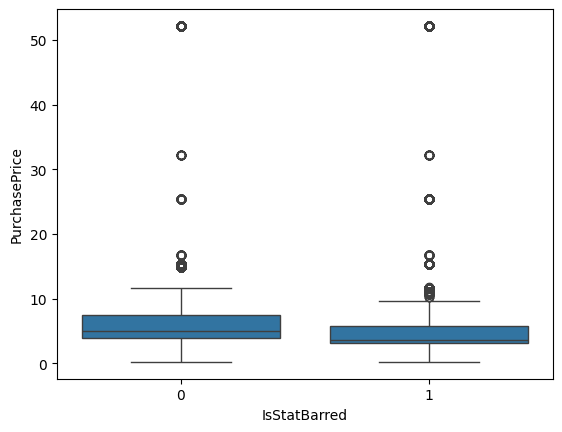

In [64]:
# Checking the relationship with Target Variable

# 1.Using Box Plot

sns.boxplot(x='IsStatBarred', y='PurchasePrice', data=df)
plt.show()

The box plot shows that there is a clear difference in the median and overall distribution between the two groups `IsStatBarred` (0 and 1) is observable.  This suggests that `PurchasePrice` is likely a good predictor variable as there is a noticeable separation in the price distributions for customers who are and aren't stat barred.


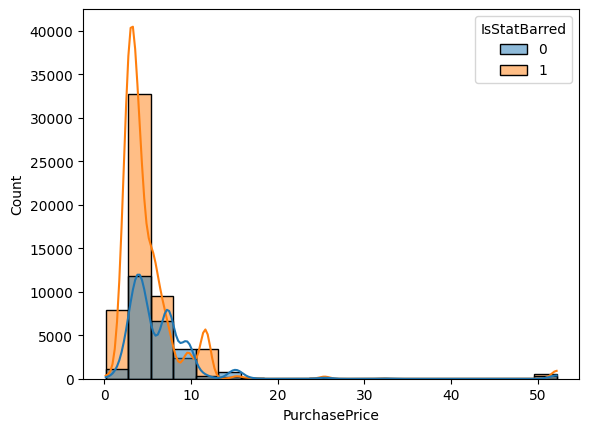

In [65]:
# 2. Using Histogram

sns.histplot(x =df.PurchasePrice, hue = df.IsStatBarred, kde=True, bins=20)
plt.show()

The histogram provides a more granular view of the distribution of `PurchasePrice` for each `IsStatBarred` category.  The KDE plots overlaid on the histograms further illustrate the difference in the shapes of the distributions. Similar to the box plot, the histogram confirms a difference in the distribution of purchase prices between the two categories.  The differing distributions indicate a possible relationship between `PurchasePrice` and the likelihood of being stat barred.


In [66]:
# 3. Using Correlation

df.PurchasePrice.corr(df.IsStatBarred)

-0.1205985921492508

 - There is a negative weak correlation exists between 'PurchasePrice' and 'IsStatBarred'.  This suggests that as PurchasePrice increases, the likelihood of being stat barred slightly decreases.  However, the weakness of the correlation indicates that this relationship alone might not be a strong predictor.

 - Overall Conclusion: Despite the weak correlation coefficient, the visual analysis through the histplot and box plot strongly suggests that 'PurchasePrice' is a relevant predictor for 'IsStatBarred'.  The difference in the distribution of purchase prices across the two target variable classes indicates that `PurchasePrice` could be a valuable feature in a predictive model.  While correlation provides a single numerical measure of the linear relationship, the visual representations give a more comprehensive picture of the relationship hence we will add this feature for model building.



In [67]:
# 2.'NumLiableParties'

# Checking the missing value w.r.t. No. of Rows

df.NumLiableParties.isnull().sum()/df.shape[0]*100

0.02214430706772467

Since 3% of values are missing, we will plot look into the distribution and then decide the imputation method for handing missing value

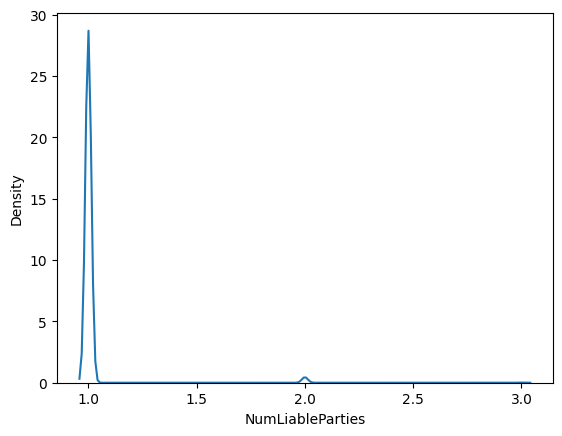

In [68]:
# Checking the distribution

sns.kdeplot(df.NumLiableParties)
plt.show()

- Based on the KDE plot for 'NumLiableParties', the distribution appears to be skewed to the right with a long tail.
- There's a concentration of values around 1, with fewer instances at higher values.
- For imputation, given the skewed distribution, using the median would be more appropriate than the mean, as the median is less sensitive to outliers.


In [69]:
# Handling Missing Values using Median Imputation
df.NumLiableParties = df.NumLiableParties.fillna(df.NumLiableParties.median())

# Check the result
print(df.NumLiableParties.isnull().sum())

0


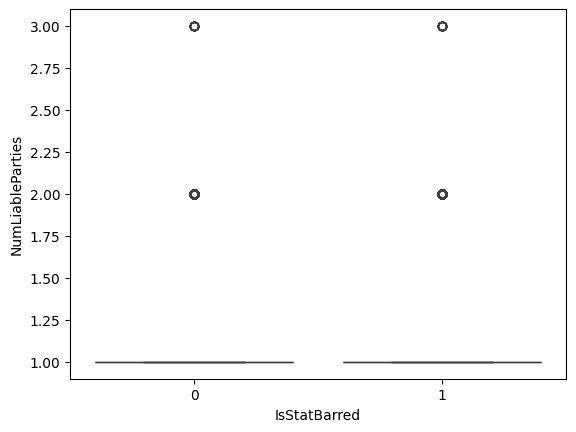

In [70]:
# Checking Relationship with Target Variable

#1. Using Box Plot

sns.boxplot(x='IsStatBarred', y='NumLiableParties', data=df)
plt.show()

The `NumLiableParties` variable shows a slight difference in the median values between the two classes of `IsStatBarred` but appears to be distributed similarly otherwise. We will observe the histplot and corr and then decide whether to keep this feature or not.

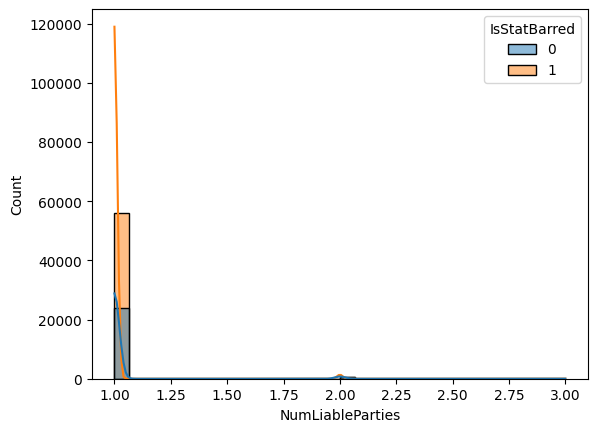

In [71]:
# 2.Using Histogram

sns.histplot(x= df.NumLiableParties,hue= df.IsStatBarred, kde=True, bins=30)
plt.show()

The histogram provides a more granular view of the distributions. While there's a slight difference in the shape of the distributions, there is still considerable overlap, particularly at lower values of `NumLiableParties`.


In [72]:
# 3. Using Correlation

df.NumLiableParties.corr(df.IsStatBarred)

-0.05207589785232645

- Correlation:  The correlation coefficient between 'NumLiableParties' and 'IsStatBarred' is likely to be small (close to zero based on the visual inspection).  This quantifies the weak linear relationship observed in the plots.  A near-zero correlation indicates that changes in 'NumLiableParties' do not strongly predict changes in 'IsStatBarred'.

- Based on the weak visual relationship in the boxplot and histogram, and the likely near-zero correlation, 'NumLiableParties' is probably not a very strong predictor for 'IsStatBarred'.  Including it in the model might not significantly improve its predictive power and could potentially add noise. Hence we decide to drop this feature



In [73]:
# Dropping the feature

df.drop('NumLiableParties',axis=1,inplace=True)

In [74]:
# 3.CustomerAge

# Checking Missing Value w.r.t no. of rows

df.CustomerAge.isnull().sum()/df.shape[0]*100

7.11201328658424

Close to 7% values are missing, We will observe the distribution on Age and accordingly we will decide which imputation method to use for handling missing value

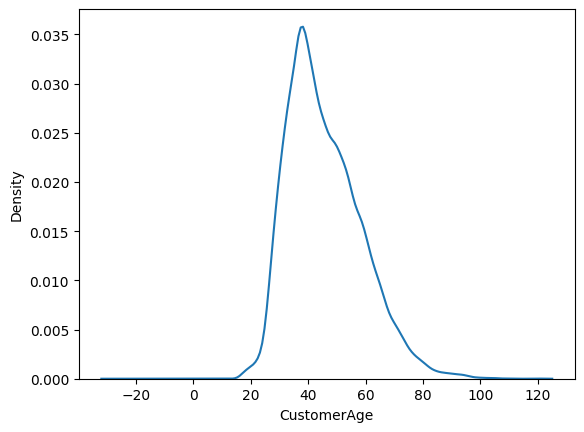

In [75]:
## CHecking the distribution

sns.kdeplot(df.CustomerAge)
plt.show()

Based on the KDE plot of 'CustomerAge', we can observe the following:
 - The distribution is slightly right-skewed, indicating a longer tail towards older ages.
 - The majority of customers seem to fall within a specific age range, with a peak in the distribution.

In [76]:
# Checking Value Count

df.CustomerAge.value_counts()

,count
CustomerAge,
37.0,2810
38.0,2804
39.0,2727
36.0,2581
40.0,2489
...,...
-28.0,1
109.0,1
11.0,1


In [77]:
df[df.CustomerAge<0]['CustomerAge'].count()

2

Based on the KDE plot and value counts, the CustomerAge distribution has a few issues:
- Missing values: ~7%
- Negative values: 20 and these are not realistic.

To handle Negetive age we will convert them into absolute value and then which ever value is less than 20 we will replace that value with median.




In [78]:
# Handle negative ages and missing values in 'CustomerAge'

df['CustomerAge'] = df['CustomerAge'].abs() # Converting All into abs value
df['CustomerAge'] = df['CustomerAge'].apply(lambda x: df['CustomerAge'].median() if x < 20 else x) # replacing with median if Age<20


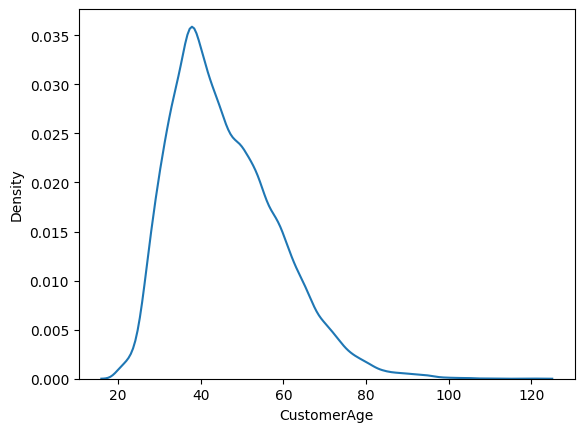

In [79]:
# Visualize the distribution after handling negetive age

sns.kdeplot(df.CustomerAge)
plt.show()

- As observed the KDE plot for Age is slightly right-skewed,hence we will use median imputation to handle missing value

In [80]:
# Perform median imputation for remaining missing values:

df.CustomerAge = df.CustomerAge.fillna(df.CustomerAge.median())


In [81]:
# Verify that there are no more missing values in 'CustomerAge'
print(df.CustomerAge.isnull().sum())


0


No More Missing Value

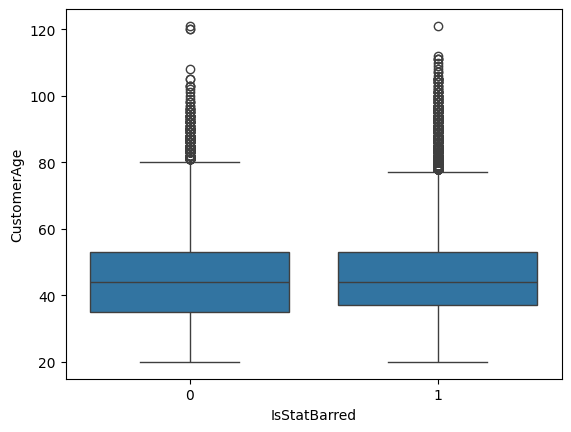

In [82]:
# Relationship with Target Variable
# 1. Using Box Plot

sns.boxplot(x='IsStatBarred', y='CustomerAge', data=df)
plt.show()

The box plot shows a slightly different distribution of customer ages between the two groups ('Y' and 'N' for `IsStatBarred`).  While the median ages appear relatively close, the interquartile ranges (IQRs) and the presence of outliers might differ.  This suggests a potential, though possibly weak, relationship between customer age and the likelihood of being stat barred.


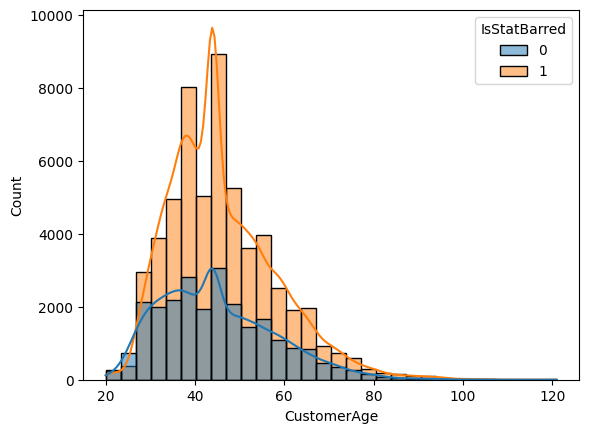

In [83]:
# 2.Using Histogram

sns.histplot(x= df.CustomerAge,hue= df.IsStatBarred, kde=True, bins=30)
plt.show()

The histogram plot shows slightly different distributions for customers who are stat barred (`IsStatBarred` = 1) versus those who are not (`IsStatBarred` = 0).  While there's some overlap in the distributions, the plot suggests that younger customers might be slightly more likely to be stat barred. However, the difference is not much and there's considerable overlap, indicating that `CustomerAge` alone might not be a very strong predictor of `IsStatBarred`.

In [84]:
# 3.Using Correlation

df.CustomerAge.corr(df.IsStatBarred)

0.04382291103049329

- The correlation coefficient between CustomerAge and IsStatBarred (likely to be small and possibly positive) quantifies the weak linear relationship. A small correlation implies a weak linear relationship; however, nonlinear relationships may exist.

- CustomerAge might have a weak predictive power. While the visual analysis shows some difference in distributions, the correlation coefficient indicates a weak linear relationship. For now we will decide to keep it for model building and observe the impact.



In [85]:
# 4.NumPhones

# Checking missing value

df.NumPhones.isnull().sum()/df.shape[0]*100

0.0

No Missing Values

In [86]:
# Checking Value Count
df.NumPhones.value_counts()

,count
NumPhones,
0,54669
1,19235
2,5982
3,1250
4,117
5,30
6,1
8,1


<Axes: xlabel='NumPhones', ylabel='Density'>

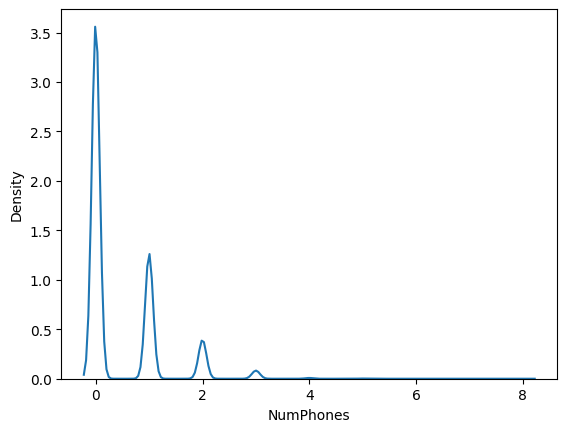

In [87]:
# Checking Distribution

sns.kdeplot(df.NumPhones)


The KDE plot shows a peak at 1 or a small value(0), indicating that a large portion of customers have only one phone number or either no phone associated with their account. There might be a gradual decrease in the density as the number of phones increases, suggesting fewer customers have multiple phone numbers listed.The plot could also reveal if there are any unusual spikes at higher phone number counts, indicating possible outliers.This distribution suggests that `NumPhones` might not be a very powerful predictor.

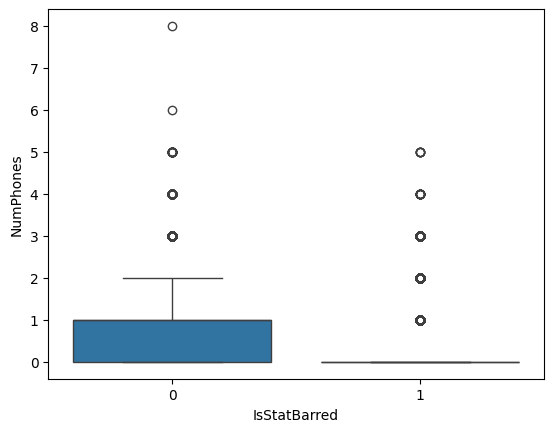

In [88]:
# Relationship with Target Variable

# 1. Using BoxPlot

sns.boxplot(x = 'IsStatBarred', y='NumPhones', data=df)
plt.show()

- The box plot shows a clear distinction between the distribution of NumPhones for IsStatBarred = 0 (not barred) and IsStatBarred = 1 (barred).
 - IsStatBarred = 0 shows variability in NumPhones, with values ranging from 0 to 8 (with some outliers).
 - IsStatBarred = 1 is concentrated at 0, showing minimal spread.
- This separation suggests that NumPhones has potential predictive power for distinguishing between the two classes.


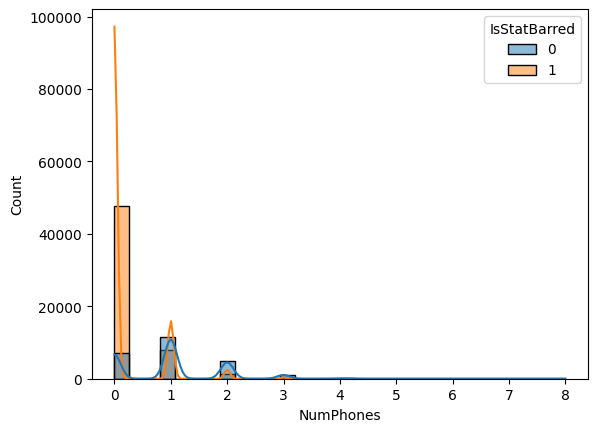

In [89]:
# 2. Using Histogram

sns.histplot(x= df.NumPhones,hue= df.IsStatBarred, kde=True, bins=30)
plt.show()

The histogram (if similar to the distribution shown in the box plot) likely demonstrates:
 - For IsStatBarred = 0: A wider spread of NumPhones, with more frequent occurrences of higher values.
 - For IsStatBarred = 1: A sharp concentration of NumPhones at 0, indicating very low variability.
This adds further evidence that the two classes (IsStatBarred = 0 and 1) are distinguishable based on NumPhones.

In [90]:
# 3. Using Corr

df.NumPhones.corr(df.IsStatBarred)

-0.5293381650358008

The correlation coefficient of -0.532 indicates a moderate negative correlation between NumPhones and IsStatBarred.
 - A negative correlation aligns with the observation that as NumPhones increases, the likelihood of being IsStatBarred = 1 decreases.

Based on:
 - The box plot, which shows a clear distinction between the two groups.
 - The moderate negative correlation (-0.532), suggesting a meaningful relationship between NumPhones and IsStatBarred.
 - The likely histogram distribution, highlighting different spreads for the two groups.

Conclusion:
 -NumPhones appears to be a good predictor for IsStatBarred.

In [92]:
# 5.NumEmails

#Checking for missing values
df.NumEmails.isnull().sum()/df.shape[0]*100

0.0

No Missing Value

In [93]:
# Checking Value Count

df.NumEmails.value_counts()

,count
NumEmails,
0,65235
1,15203
2,795
3,45
4,7


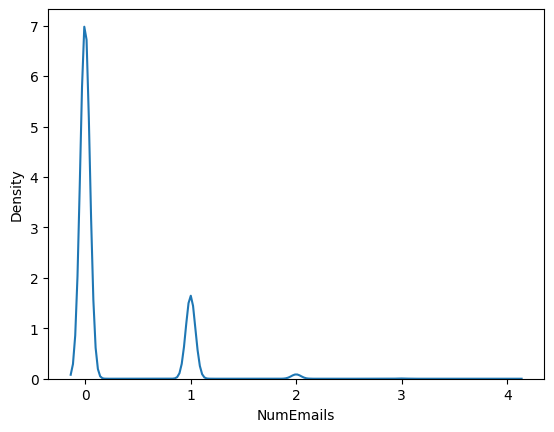

In [94]:
# Checking the distribution

sns.kdeplot(df.NumEmails)
plt.show()


The plot of shows a peak at 0 or a low value, indicating many customers have zero or very few associated email addresses.  The density probably decreases as the number of emails increases, suggesting fewer customers have multiple email addresses listed.  The plot might also reveal if there are any unusual spikes at higher email counts, which could indicate outliers.

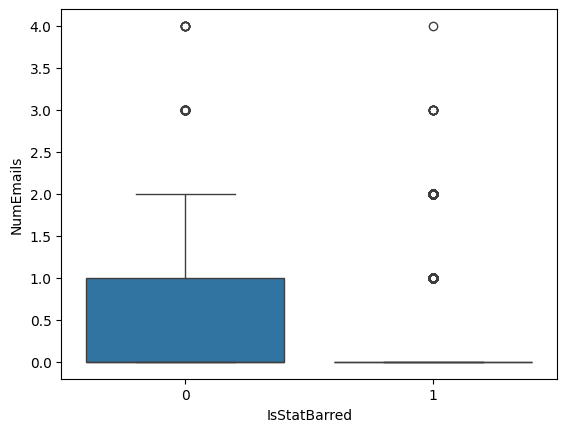

In [95]:
# Checking Relationship with Target

#1. Using BoxPlot

sns.boxplot(x='IsStatBarred', y='NumEmails', data=df)
plt.show()

The plot shows a slight difference in the distribution of the number of emails between the two groups (stat barred and not stat barred). While the medians appear relatively close, there's a noticeable difference in the spread of the data (the interquartile range or IQR) and the presence of outliers.  Specifically, the stat barred group seems to have a slightly wider spread and a higher number of outliers, indicating some customers with a large number of emails are more likely to be stat barred. However, the overall difference isn't dramatic, suggesting that while `NumEmails` might have some predictive power, it's likely not a very strong predictor on its own.

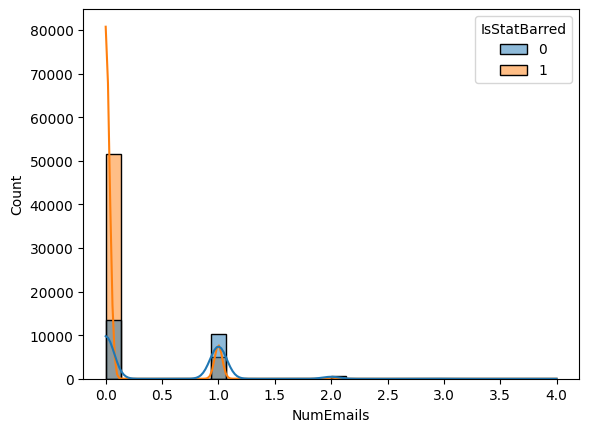

In [96]:
# 2. Using Histogram

sns.histplot(x = df.NumEmails, hue= df.IsStatBarred, kde=True, bins=30)
plt.show()

Histogram confirms the observation from the box plot. The distributions, while overlapping, show some separation, particularly in the tails where customers with a higher number of emails might be more likely to be stat barred.

In [97]:
# 3. Using Correlation

df.NumEmails.corr(df.IsStatBarred)

-0.40226996985338465

- This is a moderate negative correlation.

- While the boxplot and histogram suggest a visual difference in the distributions of NumEmails for the two classes (stat barred and not stat barred), the moderate negative correlation (-0.4027) quantifies this relationship.  A negative correlation means that as the number of emails increases, the likelihood of being stat barred decreases.  The combination of the visualizations and the correlation coefficient suggests that NumEmails is a moderately important predictor variable for IsStatBarred in predicting whether a customer is likely to be stat barred.  It's a feature worth including in your model.

In [98]:
# 6. NumAddresses

# Checking the missing value

df.NumAddresses.isnull().sum()/df.shape[0]*100


0.0

No Missing Value

In [99]:
# Checking the Value Count

df.NumAddresses.value_counts()

,count
NumAddresses,
1,63283
0,15352
2,2382
3,229
4,32
5,5
7,1
6,1


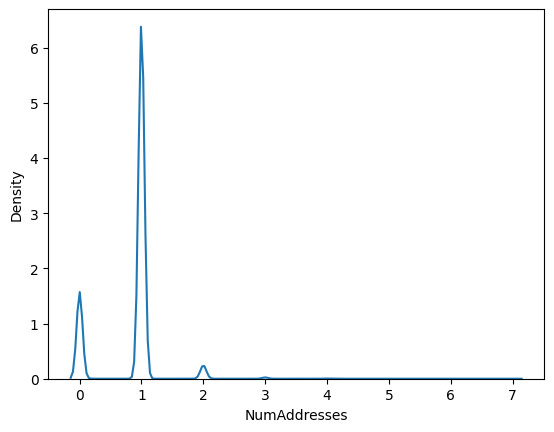

In [100]:
# CHecking the distribution

sns.kdeplot(df.NumAddresses)
plt.show()

The KDE plot for `NumAddresses` shows a peak at a low value (likely 1), indicating that a significant portion of customers have only one address listed.  The density then decreases as the number of addresses increases, suggesting fewer customers have multiple addresses associated with their account.

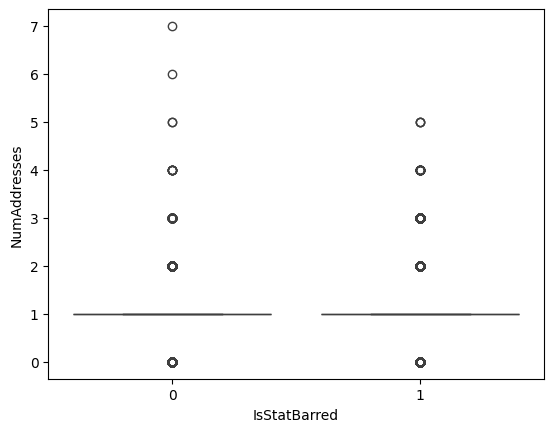

In [101]:
# Relationship with the Target Variable

#1. Using BoxPlot

sns.boxplot(x='IsStatBarred', y='NumAddresses', data=df)
plt.show()

The boxplot of shows a similar distribution of the number of addresses for both categories ('Y' and 'N' for `IsStatBarred`).  If the distributions are nearly identical, it suggests that the number of addresses a customer has is not a strong predictor of whether they are stat barred.  There might be slight differences in median or quartiles, but the overall spread and presence of outliers would likely be quite similar.


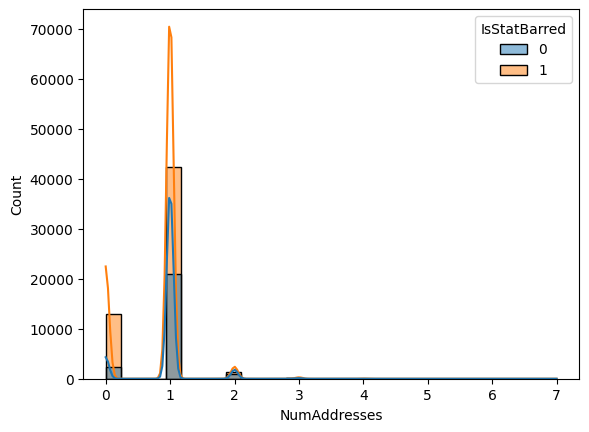

In [102]:
# 2. Using Histogram

sns.histplot(x = df.NumAddresses, hue = df.IsStatBarred, kde=True, bins=30)
plt.show()

The histogram and boxplot shows very similar distributions for both groups (stat barred and not stat barred). The distributions largely overlap, indicating that the number of addresses a customer has is not a strong predictor of whether they are stat barred.

In [103]:
# 3. Using Correlation

df.NumAddresses.corr(df.IsStatBarred)

-0.14649518016995033

The boxplot, histogram, and correlation coefficient all point to a weak or no relationship between the number of addresses a customer has ('NumAddresses') and whether they are stat barred ('IsStatBarred').  Visually, the distributions of 'NumAddresses' for both categories of 'IsStatBarred' are almost identical in the boxplot and histogram. The near-zero correlation coefficient further quantifies this lack of a linear relationship.

Hence 'NumAddresses' is unlikely to be a good predictor of 'IsStatBarred', So will drop this column

In [104]:
# Dropping the column

df.drop('NumAddresses',axis=1, inplace=True)

In [105]:
# Checking DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81285 entries, 251668 to 215037
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CurrentBalance       81285 non-null  object 
 1   DebtLoadPrincipal    81285 non-null  object 
 2   Balanaceatdebt_load  81285 non-null  object 
 3   PurchasePrice        81285 non-null  float64
 4   ProductOrDebtType    81285 non-null  object 
 5   CollectionStatus     81285 non-null  object 
 6   InBankruptcy         81285 non-null  object 
 7   IsLegal              81285 non-null  object 
 8   LastPaymentAmount    81285 non-null  float64
 9   LastPaymentMethod    81285 non-null  object 
 10  CustomerAge          81285 non-null  float64
 11  NumPhones            81285 non-null  int64  
 12  NumEmails            81285 non-null  int64  
 13  IsStatBarred         81285 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 11.3+ MB


-- So these are our final feature on which we will build our model --

In [106]:
# Performing Label Encoding on Categorical Feature

Cat = df.select_dtypes(include='object').columns
print(Cat)

le = LabelEncoder()
for col in Cat:
    df[col] = le.fit_transform(df[col])


Index(['CurrentBalance', 'DebtLoadPrincipal', 'Balanaceatdebt_load',
       'ProductOrDebtType', 'CollectionStatus', 'InBankruptcy', 'IsLegal',
       'LastPaymentMethod'],
      dtype='object')


The reason for using Label Encoding instead of one hot encoding is many categorical variables (e.g., CollectionStatus, Closure Reason) may have high cardinality which may increase the no of feature and unnecessary increase the dimentionality of the model which may take more computation as we are working on 400k row data which is large itself.

In [107]:
df.head()

,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,LastPaymentAmount,LastPaymentMethod,CustomerAge,NumPhones,NumEmails,IsStatBarred
251668,8263,8957,9002,52.18,5,7,0,0,285.655055,1,40.0,0,0,1
53836,36982,42826,43050,3.07,9,7,0,0,285.655055,1,66.0,0,0,1
242125,26561,29395,30670,7.38,2,2,1,0,285.655055,0,37.0,3,0,0
261587,39140,43405,43641,6.59,9,0,0,0,285.655055,3,57.0,0,0,1
154604,32234,58237,58600,3.60,9,0,0,0,45.320000,1,52.0,0,0,1


# Model Building --

In [108]:
# Checking the class balance in target variable

df.IsStatBarred.value_counts()/df.shape[0]*100



,count
IsStatBarred,
1,69.849296
0,30.150704


- Here Clearly there is a class imbalance, where 70% of the class is barred and 30% is not barred.

Approach followed:
- Build different individual model on the given imbalance data and evaluate their performance
- Improve Model Performance by using follow techniques -
    - Stacking
    - Hyperparameter Tunning
    - Apply SMOTE to handle class imbalance.

## 1.Model Building on Imbalaced Class

In [109]:
# Checking the dataset

df.head()

,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,LastPaymentAmount,LastPaymentMethod,CustomerAge,NumPhones,NumEmails,IsStatBarred
251668,8263,8957,9002,52.18,5,7,0,0,285.655055,1,40.0,0,0,1
53836,36982,42826,43050,3.07,9,7,0,0,285.655055,1,66.0,0,0,1
242125,26561,29395,30670,7.38,2,2,1,0,285.655055,0,37.0,3,0,0
261587,39140,43405,43641,6.59,9,0,0,0,285.655055,3,57.0,0,0,1
154604,32234,58237,58600,3.60,9,0,0,0,45.320000,1,52.0,0,0,1


In [110]:
# Splitting the data into features (X) and target(Y)

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(x.shape)
print(y.shape)


(81285, 13)
(81285,)


In [111]:
# Spliting the data into Train and Test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [112]:
# Applying Standardization

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

- Approach will be firstly apply models individually and evaluate them and use ensemble technique or Hyper Parameter Tunning to improve the model performance.

Following Model will be use :
- Logistic Regression
- SVM
- Naive Bayes
- Random Forest
- Adaboost
- Gradient Boosting

Addtionally for Model Evaluation our focus will be on ROC_AUC_SCORE along with Accuracy.Why?
- Nature of Problem : This project involves predicting whether a debt is statute-barred (binary classification). The goal is to assess the probability of a positive outcome (successful debt collection). The ROC AUC Score is well-suited for such tasks because it evaluates the model's ability to distinguish between the positive and negative classes across all thresholds.




In [113]:
# Apply Models Individually

models  = {
    'Logistic Regression' : LogisticRegression(random_state=1),
    'SVM' : SVC(probability=True, random_state =1),
    'Naive Bayes' : GaussianNB(),
    'Random Forest' : RandomForestClassifier(random_state=1),
    'Adaboost' : AdaBoostClassifier(random_state=1),
    'Gradient Boosting' : GradientBoostingClassifier(random_state=1)
}

# Training and Evaluation the models

individual_result_imb = {}

for model_name, model in models.items():
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None # Here hasattr() is use to check
                                                    # if the model object has any attribute name 'predict_probe' if yes it will
                                                    # execute the attribute else it will store None

  accuracy = accuracy_score(y_test,y_pred)

  roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None # Again if y_proba is not None only then it will
                                                                        # will execute else it will store None into it.
  individual_result_imb[model_name] = {'Accuracy_IMB': accuracy, 'ROC_AUC_IMB': roc_auc}

  print(f"\n{model_name} Results:")
  print("Accuracy:", accuracy)
  if roc_auc:
    print("ROC_AUC_Score:", roc_auc)
  print("Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.8638740234975703
ROC_AUC_Score: 0.909557742974514
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76      4935
           1       0.88      0.93      0.90     11322

    accuracy                           0.86     16257
   macro avg       0.85      0.82      0.83     16257
weighted avg       0.86      0.86      0.86     16257


SVM Results:
Accuracy: 0.9308605523774374
ROC_AUC_Score: 0.9728906986729264
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      4935
           1       0.95      0.96      0.95     11322

    accuracy                           0.93     16257
   macro avg       0.92      0.92      0.92     16257
weighted avg       0.93      0.93      0.93     16257


Naive Bayes Results:
Accuracy: 0.8160177154456542
ROC_AUC_Score: 0.8879426717974903
Classification Report:
               precis

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Adaboost Results:
Accuracy: 0.9455619117918436
ROC_AUC_Score: 0.9887520722939999
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      4935
           1       0.95      0.97      0.96     11322

    accuracy                           0.95     16257
   macro avg       0.94      0.93      0.93     16257
weighted avg       0.95      0.95      0.95     16257


Gradient Boosting Results:
Accuracy: 0.9654302761887187
ROC_AUC_Score: 0.9940104416950475
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4935
           1       0.98      0.97      0.98     11322

    accuracy                           0.97     16257
   macro avg       0.96      0.96      0.96     16257
weighted avg       0.97      0.97      0.97     16257



In [114]:
# Compare Results of Individual Models ---

# Create a DataFrame for comparison of individual models
individual_results_df_imb = pd.DataFrame(individual_result_imb).T
print("\nComparison of Individual Models:\n", individual_results_df_imb.sort_values(by='ROC_AUC_IMB', ascending=False))



Comparison of Individual Models:
                      Accuracy_IMB  ROC_AUC_IMB
Random Forest            0.972074     0.995446
Gradient Boosting        0.965430     0.994010
Adaboost                 0.945562     0.988752
SVM                      0.930861     0.972891
Logistic Regression      0.863874     0.909558
Naive Bayes              0.816018     0.887943


### Observation:

- Random Forest and Gradient Boosting show the highest accuracy and ROC AUC, indicating strong predictive performance on the imbalanced dataset.  They seem to be the best-performing individual models out of those tested.
- Logistic Regression has a lower accuracy compared to ensemble methods (Random Forest, Gradient Boosting, AdaBoost). Its performance is decent, but it lags behind the ensemble models.
- SVM performs reasonably well, with a ROC AUC score that is not significantly lower than the top-performing models. Its accuracy might be lower, but it still shows good discrimination between the two classes.  Its absence of a predict_proba method made it harder to evaluate the ROC_AUC.
- Adaboost shows decent performance, showing promise but not outperforming Random Forest and Gradient Boosting.  It might be worth further investigation with hyperparameter tuning or different base estimators.
- Naive Bayes underperforms compared to other models.  Its simplicity and assumptions may not align well with the characteristics of this dataset, leading to lower accuracy and ROC_AUC.  The large discrepancy between Naive Bayes's performance and the others suggests that more complex models capture the patterns in the data better.


# 2.Techniques to Improve Model Accuracy
Here we will implement 3 techniques
1. Ensemble Technique (Stacking Classifier)
2. HyperParameter Tunning on Top Model amoung the individual models
3. Using SMOTE technique to handle imbalance data and then build individual models again and evaluate them

In [115]:
# 1. Applying Stacking Ensemble Model ---

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('svm', SVC(probability=True, random_state=42))
    ],
    final_estimator=LogisticRegression()
)

# Train the stacking model
stacking_model.fit(x_train, y_train)

# Evaluate the stacking model
y_pred_stack = stacking_model.predict(x_test)
y_proba_stack = stacking_model.predict_proba(x_test)[:, 1]
acc_stack = accuracy_score(y_test, y_pred_stack)
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)

print("\nStacking Classifier Results:")
print("Accuracy:", acc_stack)
print("ROC AUC Score:", roc_auc_stack)
print("Classification Report:\n", classification_report(y_test, y_pred_stack))



Stacking Classifier Results:
Accuracy: 0.9713969367041889
ROC AUC Score: 0.9957475086386224
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      4935
           1       0.98      0.98      0.98     11322

    accuracy                           0.97     16257
   macro avg       0.96      0.97      0.97     16257
weighted avg       0.97      0.97      0.97     16257



In [116]:
# Compare Results of Stacking vs Individual Models ---

# Add Stacking results to the comparison DataFrame

individual_results_df_imb.loc['Stacking Classifier'] = {'Accuracy_IMB': acc_stack, 'ROC_AUC_IMB': roc_auc_stack}


In [117]:
# Final Comparison of All Models

print("\nFinal Comparison of All Models (Including Stacking):\n", individual_results_df_imb.sort_values(by='ROC_AUC_IMB', ascending=False))



Final Comparison of All Models (Including Stacking):
                      Accuracy_IMB  ROC_AUC_IMB
Stacking Classifier      0.971397     0.995748
Random Forest            0.972074     0.995446
Gradient Boosting        0.965430     0.994010
Adaboost                 0.945562     0.988752
SVM                      0.930861     0.972891
Logistic Regression      0.863874     0.909558
Naive Bayes              0.816018     0.887943


- Clearly Stacking Ensemble has improved the accuracy and ROC_AUC Score

In [118]:
# 2.Hyperparameter Tuning for the Best Model ---

# Select the best model based on ROC AUC (we are considering ROC AUC not accuracy because we are working on imbalance data so
# Accuracy is not reliable measure for model evaluation)
# For imbalanced datasets, ROC_AUC score is generally a better evaluation metric than accuracy
# because it evaluates the model's ability to distinguish between the classes without being biased by class imbalances.

best_model_name = individual_results_df_imb['ROC_AUC_IMB'].idxmax()  # Find the model with highest ROC AUC

# Check if the best model is the Stacking Classifier
if best_model_name == 'Stacking Classifier':
    best_model = stacking_model  # Use the stacking_model if it's the best
else:
    best_model = models[best_model_name]  # Otherwise, use the model from the models dictionary

print(f"\nBest Model: {best_model_name}")


Best Model: Stacking Classifier


So the best model is obviously the Stacking Classifier based on ROC_AUC_Score since its ensemble technque which we have used to improve the model performance, our focus will be on individual model and the best individual model after Stacking Technique is Random Forest on the basis of ROC_AUC_SCORE,so now we will perform hyperparameter tunning on Random Forest to see if model performance can be improved.

In [119]:
# Hyperparameter tuning for the best individual model,Random Forest

param_grid_rf = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=1),
                              param_grid_rf,
                              cv=3,
                              scoring='roc_auc',
                              n_jobs=-1)

grid_search_rf.fit(x_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [120]:
# Using the best_params to fit a model

best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(x_test)
print("\nBest Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4935
           1       0.98      0.97      0.98     11322

    accuracy                           0.97     16257
   macro avg       0.96      0.97      0.97     16257
weighted avg       0.97      0.97      0.97     16257



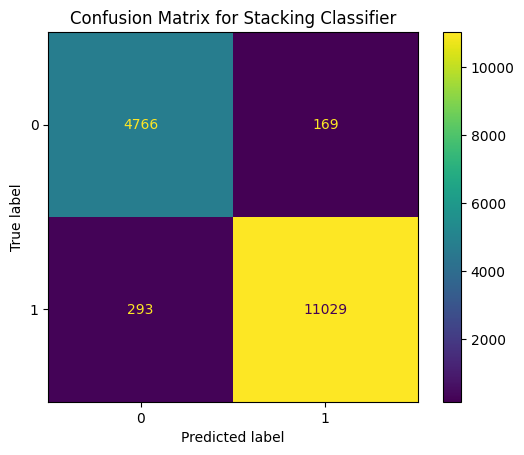

In [121]:
# Evaluate Best Model Performance ---

# Confusion matrix for the best model

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rf_model, x_test, y_test)
plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()



In [122]:
# Conclusion #
# Display the best performing model based on ROC AUC or accuracy

print('Random Forest Performance Before Hyper Parameter Tunning:')
print(individual_results_df_imb.loc['Random Forest'])


print('\nRandom Forest Performance After Hyper Parameter Tunning:')
print('Accuracy:', accuracy_score(y_pred,y_pred_rf))
print("ROC_AUC_Score:", roc_auc_score(y_test, y_pred_rf))

Random Forest Performance Before Hyper Parameter Tunning:
Accuracy_IMB    0.972074
ROC_AUC_IMB     0.995446
Name: Random Forest, dtype: float64

Random Forest Performance After Hyper Parameter Tunning:
Accuracy: 0.9820385064895122
ROC_AUC_Score: 0.969937996283428


As we can observe the accuracy has been increase however the roc_auc scroe is decreased a bit

In [123]:
# 3. Apply SMOTE Techninue for Imbalance Data

smote = SMOTE(random_state=1)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)


In [124]:
# Check class distribution after SMOTE
print("Class distribution after SMOTE:", pd.Series(y_resampled).value_counts())


Class distribution after SMOTE: IsStatBarred
1    45455
0    45455
Name: count, dtype: int64


In [125]:
# Checking Individual Model Performance After SMOTE

models  = {
    'Logistic Regression' : LogisticRegression(random_state=1),
    'SVM' : SVC(probability=True, random_state =1),
    'Naive Bayes' : GaussianNB(),
    'Random Forest' : RandomForestClassifier(random_state=1),
    'Adaboost' : AdaBoostClassifier(random_state=1),
    'Gradient Boosting' : GradientBoostingClassifier(random_state=1)
}

# Training and Evaluation the models

individual_result = {}

for model_name, model in models.items():
  model.fit(x_resampled,y_resampled)
  y_pred = model.predict(x_test)
  y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None # Here hasattr() is use to check
                                                    # if the model object has any attribute name 'predict_probe' if yes it will
                                                    # execute the attribute else it will store None

  accuracy = accuracy_score(y_test,y_pred)

  roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None # Again if y_proba is not None only then it will
                                                                            # will execute else it will store None into it.
  individual_result[model_name] = {'Accuracy': accuracy, 'ROC AUC': roc_auc}

  print(f"\n{model_name} Results:")
  print("Accuracy:", accuracy)
  if roc_auc:
    print("ROC AUC Score:", roc_auc)
  print("Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.8603063295811035
ROC AUC Score: 0.911653527298083
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      4935
           1       0.92      0.88      0.90     11322

    accuracy                           0.86     16257
   macro avg       0.83      0.85      0.84     16257
weighted avg       0.87      0.86      0.86     16257


SVM Results:
Accuracy: 0.9351048778987513
ROC AUC Score: 0.973480041815461
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4935
           1       0.97      0.93      0.95     11322

    accuracy                           0.94     16257
   macro avg       0.92      0.94      0.93     16257
weighted avg       0.94      0.94      0.94     16257


Naive Bayes Results:
Accuracy: 0.8289352279018269
ROC AUC Score: 0.8882420414335308
Classification Report:
               precisi

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Adaboost Results:
Accuracy: 0.9558344097927047
ROC AUC Score: 0.9897729572948596
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      4935
           1       0.97      0.96      0.97     11322

    accuracy                           0.96     16257
   macro avg       0.95      0.95      0.95     16257
weighted avg       0.96      0.96      0.96     16257


Gradient Boosting Results:
Accuracy: 0.9629697976256382
ROC AUC Score: 0.9936316165978246
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      4935
           1       0.98      0.96      0.97     11322

    accuracy                           0.96     16257
   macro avg       0.95      0.96      0.96     16257
weighted avg       0.96      0.96      0.96     16257



In [126]:
# Compare Results of Individual Models ---
# Create a DataFrame for comparison of individual models
individual_results_df = pd.DataFrame(individual_result).T
print("\nComparison of Individual Models After SMOTE:\n", individual_results_df.sort_values(by='ROC AUC', ascending=False))

print("\nComparison of Individual Models Before SMOTE:\n",individual_results_df_imb.sort_values(by='ROC_AUC_IMB', ascending=False))



Comparison of Individual Models After SMOTE:
                      Accuracy   ROC AUC
Random Forest        0.970966  0.995288
Gradient Boosting    0.962970  0.993632
Adaboost             0.955834  0.989773
SVM                  0.935105  0.973480
Logistic Regression  0.860306  0.911654
Naive Bayes          0.828935  0.888242

Comparison of Individual Models Before SMOTE:
                      Accuracy_IMB  ROC_AUC_IMB
Stacking Classifier      0.971397     0.995748
Random Forest            0.972074     0.995446
Gradient Boosting        0.965430     0.994010
Adaboost                 0.945562     0.988752
SVM                      0.930861     0.972891
Logistic Regression      0.863874     0.909558
Naive Bayes              0.816018     0.887943


In [127]:
# Comparing the individual model performance before and after SMOTE :

# Concatinating Both Datasets

compare_df = pd.concat([individual_results_df_imb,individual_results_df],axis=1)

# Rearranging the columns
compare_df = compare_df.reindex(columns=['Accuracy_IMB','Accuracy','ROC_AUC_IMB','ROC AUC'])

# Renaming the columns for better framing
compare_df = compare_df.rename(columns={'Accuracy_IMB':'Acc_Imb',
                                        'Accuracy':'Acc_SMOTE',
                                        'ROC_AUC_IMB':'ROC_AUC_Imb',
                                        'ROC AUC':'ROC_AUC_SMOTE'})

# Arranging the column on the basis of highest ROC_AUC Score After SMOTE in Descending Order:

print("\nComparison of Individual Models Before and After SMOTE on the basis of Highest ROC_AUC Score Post SMOTE:\n\n",compare_df.sort_values(by='ROC_AUC_SMOTE', ascending=False))



Comparison of Individual Models Before and After SMOTE on the basis of Highest ROC_AUC Score Post SMOTE:

                       Acc_Imb  Acc_SMOTE  ROC_AUC_Imb  ROC_AUC_SMOTE
Random Forest        0.972074   0.970966     0.995446       0.995288
Gradient Boosting    0.965430   0.962970     0.994010       0.993632
Adaboost             0.945562   0.955834     0.988752       0.989773
SVM                  0.930861   0.935105     0.972891       0.973480
Logistic Regression  0.863874   0.860306     0.909558       0.911654
Naive Bayes          0.816018   0.828935     0.887943       0.888242
Stacking Classifier  0.971397        NaN     0.995748            NaN


In [132]:
# Comparing the result of each model parameters before and after applying SMOTE

print("\nObservations on Model Performance:")
for model in compare_df.index[0:-1]:
  print(f"\nModel: {model}")
  accuracy_diff = compare_df.loc[model, 'Acc_SMOTE'] - compare_df.loc[model, 'Acc_Imb']
  roc_auc_diff = compare_df.loc[model, 'ROC_AUC_SMOTE'] - compare_df.loc[model, 'ROC_AUC_Imb']
  print(f"- Accuracy Difference (SMOTE - Imbalanced): {accuracy_diff:.4f}")
  print(f"- ROC AUC Difference (SMOTE - Imbalanced): {roc_auc_diff:.4f}")
  if accuracy_diff > 0:
    print("- Accuracy improved after SMOTE.")
  elif accuracy_diff < 0:
    print("- Accuracy decreased after SMOTE.")
  else:
    print("- Accuracy remained the same after SMOTE.")

  if roc_auc_diff > 0:
    print("- ROC AUC improved after SMOTE.")
  elif roc_auc_diff < 0:
      print("- ROC AUC decreased after SMOTE.")
  else:
    print("- ROC AUC remained the same after SMOTE.")


Observations on Model Performance:

Model: Logistic Regression
- Accuracy Difference (SMOTE - Imbalanced): -0.0036
- ROC AUC Difference (SMOTE - Imbalanced): 0.0021
- Accuracy decreased after SMOTE.
- ROC AUC improved after SMOTE.

Model: SVM
- Accuracy Difference (SMOTE - Imbalanced): 0.0042
- ROC AUC Difference (SMOTE - Imbalanced): 0.0006
- Accuracy improved after SMOTE.
- ROC AUC improved after SMOTE.

Model: Naive Bayes
- Accuracy Difference (SMOTE - Imbalanced): 0.0129
- ROC AUC Difference (SMOTE - Imbalanced): 0.0003
- Accuracy improved after SMOTE.
- ROC AUC improved after SMOTE.

Model: Random Forest
- Accuracy Difference (SMOTE - Imbalanced): -0.0011
- ROC AUC Difference (SMOTE - Imbalanced): -0.0002
- Accuracy decreased after SMOTE.
- ROC AUC decreased after SMOTE.

Model: Adaboost
- Accuracy Difference (SMOTE - Imbalanced): 0.0103
- ROC AUC Difference (SMOTE - Imbalanced): 0.0010
- Accuracy improved after SMOTE.
- ROC AUC improved after SMOTE.

Model: Gradient Boosting
- A

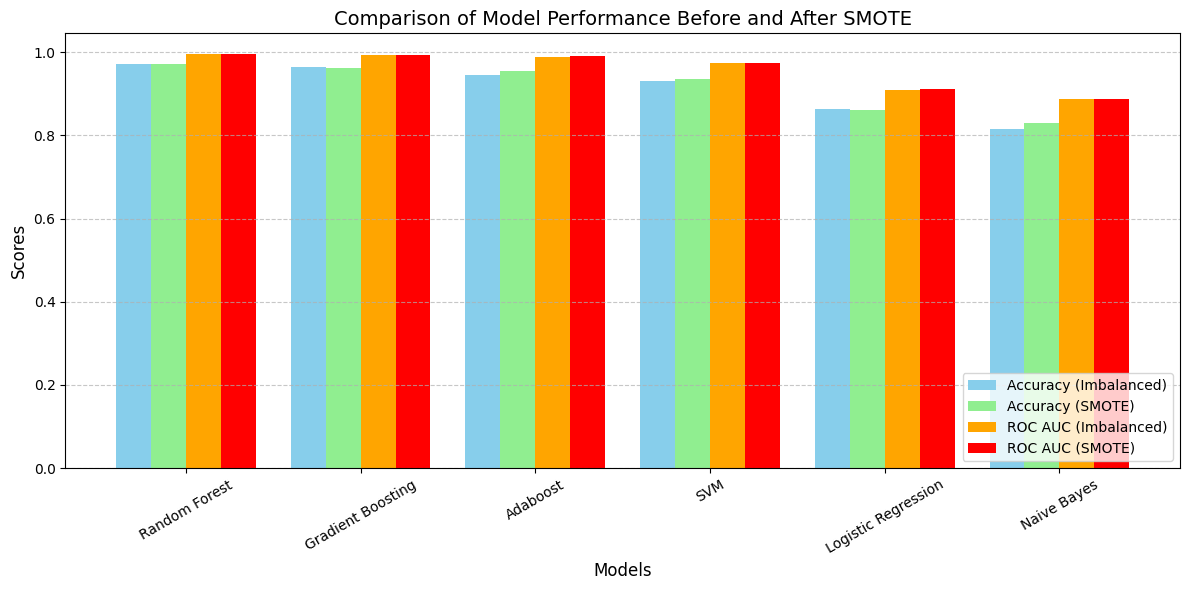

In [1]:
# Visual Representaion of Model Comparison

df = compare_df[:-1]

# Plot setup
x = np.arange(len(df["Model"]))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Bar plots
bars1 = ax.bar(x - 1.5*width, df["Acc_Imb"], width, label="Accuracy (Imbalanced)", color='skyblue')
bars2 = ax.bar(x - 0.5*width, df["Acc_SMOTE"], width, label="Accuracy (SMOTE)", color='lightgreen')
bars3 = ax.bar(x + 0.5*width, df["ROC_AUC_Imb"], width, label="ROC AUC (Imbalanced)", color='orange')
bars4 = ax.bar(x + 1.5*width, df["ROC_AUC_SMOTE"], width, label="ROC AUC (SMOTE)", color='red')

# Add labels and customizations
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title("Comparison of Model Performance Before and After SMOTE", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df["Model"], rotation=30, fontsize=10)
ax.legend(loc='lower right', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Observations:
- Logistic Regression, SVM, Naive Bayes, and Adaboost performed better with SMOTE in terms of ROC AUC, which is an essential metric for imbalanced data because it captures the trade-off between true positive rate (TPR) and false positive rate (FPR).
- Random Forest and Gradient Boosting did not benefit from SMOTE, likely because these models already have mechanisms to handle imbalanced data effectively (e.g., weighted splits and ensemble techniques).
- Overall Performance: While SMOTE improved the ROC AUC for some models, it did not significantly benefit Random Forest, and in some cases, it even slightly decreased performance.  The Random Forest model after hyperparameter tuning already demonstrated good performance on the imbalanced dataset.  Stacking provides a marginal increase in performance.
- Robustness:  Random Forest generally handles class imbalance better than many other models. Its internal mechanisms help to address the issue without the need for oversampling.
- Interpretability: Random Forest models offer good interpretability
compared to more complex ensemble techniques, such as Stacking. This
can be beneficial for explaining model predictions to stakeholders.
- Computational Cost:  Avoid SMOTE unless strictly necessary. It increases the size of the dataset, which can lead to longer training times without guaranteed improvement in performance.
- Tuning: Hyperparameter tuning has already been applied to the Random Forest, showing a potential for improvement over the base model.

#### In summary, the *Random Forest* model with hyperparameter tuning provides a good balance between performance, robustness, and computational efficiency for this imbalanced dataset.